# Example 2

Here we will look at the actual agency analysis again. 

First, lets import all necessary packages
\

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import pandas as pd
import os
import networkx as nx
import pickle
import sys

# Change directory to where packages are stored
os.chdir("..")

from pyanimats import *
from pyTPM import *
import actual_agency as agency
import pyphi
from pyphi import actual, config, Direction

pyphi.config.VALIDATE_SUBSYSTEM_STATES = False
pyphi.config.PARTITION_TYPE = 'TRI'

# Change directory back to Example directory
os.chdir("Example")

%matplotlib inline
%load_ext autoreload
%autoreload 2
%aimport pyTPM, pyanimats, actual_agency


Welcome to PyPhi!

If you use PyPhi in your research, please cite the paper:

  Mayner WGP, Marshall W, Albantakis L, Findlay G, Marchman R, Tononi G.
  (2018). PyPhi: A toolbox for integrated information theory.
  PLOS Computational Biology 14(7): e1006343.
  https://doi.org/10.1371/journal.pcbi.1006343

Documentation is available online (or with the built-in `help()` function):
  https://pyphi.readthedocs.io

To report issues, please use the issue tracker on the GitHub repository:
  https://github.com/wmayner/pyphi

For general discussion, you are welcome to join the pyphi-users group:
  https://groups.google.com/forum/#!forum/pyphi-users

To suppress this message, either:
  - Set `WELCOME_OFF: true` in your `pyphi_config.yml` file, or
  - Set the environment variable PYPHI_WELCOME_OFF to any value in your shell:
        export PYPHI_WELCOME_OFF='yes'



In [2]:
# Next, we load the necessary data from mabe output 
# genome
with open('genome.pkl','rb') as f:
    all_genomes = pickle.load(f)
# and activity
with open('activity.pkl','rb') as f:
    activity = pickle.load(f)

In [3]:
#Then, we can define a particular animat and trial that we are interested in investigating
generations = 1000
n_agents = int(generations/500.+1)
n_runs = 5
n_trials = 64

run = 4
agent = 2
trial = 55
transition = 10


In [4]:
# Now parse the data
# we can pick the genome of one agent and parse it (make it readable for our scripts) 
genome = agency.get_genome(all_genomes, run, agent)

# from the genome we can reconstruct the TPM (transition probability matrix) and CM (connectivity matrix)
TPM, TPM_gates, cm = genome2TPM(genome)

# reformat the activity to a single list for each trial
brain_activity = []
for r in range(n_runs):
    brain_activity.append(agency.getBrainActivity(activity[r], n_agents))

BA = brain_activity[run][agent]

Creating activity matrix from MABE output...
Creating activity matrix from MABE output...
Creating activity matrix from MABE output...
Creating activity matrix from MABE output...
Creating activity matrix from MABE output...


In [5]:
# Now we are ready to define our animat
animat = Animat({}) # using standard settings

# give it a brain
animat.saveBrain(TPM,cm)

# and some brain activity
animat.saveBrainActivity(BA)

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


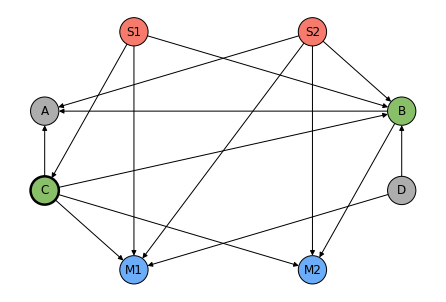

In [6]:
# before the analysis, lets have a look at the animat
agency.plot_brain(cm)

In [17]:
# Now, we can do the backtracking analysis for our trial
max_back_steps = 10
CC = agency.backtrack_cause_trial(animat,60,max_back_steps)

Calculating causal chain for trial 60.
This might be a good time for a coffee


In [18]:
# then we can look at the backtracking pattern for each step
BT = []
for t in range(max_back_steps,len(CC)):
    BT.append(agency.get_backtrack_array(CC[t],animat.n_nodes,animat))

In [19]:
# lets inspect the average backtracking pattern
avgBT = []
for t in range(len(BT)):
    avgBT.append(np.mean(BT[t],0))

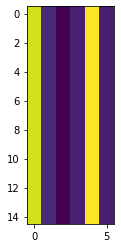

In [20]:
plt.imshow(avgBT)

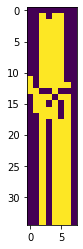

In [22]:
plt.imshow(BA[60,:,:])

In [15]:
print(BT)

[array([[0.5       , 0.        , 0.        , 0.        , 0.5       ,
        0.        ],
       [0.5       , 0.        , 0.        , 0.        , 0.5       ,
        0.        ],
       [0.5       , 0.        , 0.        , 0.        , 0.5       ,
        0.        ],
       [0.5       , 0.        , 0.        , 0.        , 0.5       ,
        0.        ],
       [0.5       , 0.        , 0.        , 0.        , 0.5       ,
        0.        ],
       [0.5       , 0.        , 0.        , 0.        , 0.5       ,
        0.        ],
       [0.5       , 0.        , 0.        , 0.        , 0.5       ,
        0.        ],
       [0.5       , 0.        , 0.        , 0.        , 0.5       ,
        0.        ],
       [0.67864925, 0.17864925, 0.        , 0.        , 0.67864925,
        0.17864925],
       [0.25568   , 0.46847533, 0.        , 0.45387133, 0.58901333,
        0.25568   ]]), array([[0.5       , 0.        , 0.        , 0.        , 0.5       ,
        0.        ],
       [0.5       

In [23]:
CC

[[(CausalLink
     α = 0.5406  [S1, S2, C, D] ◀━━ [M1], CausalLink
     α = 1.0  [S2, B, C] ◀━━ [M2], CausalLink
     α = 0.415  [S2, B, C, D] ◀━━ [M1, M2]), (CausalLink
     α = 0.2996  [S1, S2, C, D] ◀━━ [B], CausalLink
     α = 1.0  [S1, C] ◀━━ [C], CausalLink
     α = 0.1926  [S1, S2, C, D] ◀━━ [B, C]), (CausalLink
     α = 1.0  [S1, C] ◀━━ [C],), (CausalLink
     α = 1.0  [S1, C] ◀━━ [C],), (CausalLink
     α = 1.0  [S1, C] ◀━━ [C],), (CausalLink
     α = 1.0  [S1, C] ◀━━ [C],), (CausalLink
     α = 1.0  [S1, C] ◀━━ [C],), (CausalLink
     α = 1.0  [S1, C] ◀━━ [C],), (CausalLink
     α = 1.0  [S1, C] ◀━━ [C],), (CausalLink
     α = 1.0  [S1, C] ◀━━ [C],)], [(CausalLink
     α = 0.5406  [S1, S2, C, D] ◀━━ [M1], CausalLink
     α = 1.0  [S2, B, C] ◀━━ [M2], CausalLink
     α = 0.415  [S2, B, C, D] ◀━━ [M1, M2]), (CausalLink
     α = 0.2996  [S1, S2, C, D] ◀━━ [B], CausalLink
     α = 1.0  [S1, C] ◀━━ [C], CausalLink
     α = 0.1926  [S1, S2, C, D] ◀━━ [B, C]), (CausalLink
     α = 1

In [24]:
CC[0]

[(CausalLink
    α = 0.5406  [S1, S2, C, D] ◀━━ [M1], CausalLink
    α = 1.0  [S2, B, C] ◀━━ [M2], CausalLink
    α = 0.415  [S2, B, C, D] ◀━━ [M1, M2]), (CausalLink
    α = 0.2996  [S1, S2, C, D] ◀━━ [B], CausalLink
    α = 1.0  [S1, C] ◀━━ [C], CausalLink
    α = 0.1926  [S1, S2, C, D] ◀━━ [B, C]), (CausalLink
    α = 1.0  [S1, C] ◀━━ [C],), (CausalLink
    α = 1.0  [S1, C] ◀━━ [C],), (CausalLink
    α = 1.0  [S1, C] ◀━━ [C],), (CausalLink
    α = 1.0  [S1, C] ◀━━ [C],), (CausalLink
    α = 1.0  [S1, C] ◀━━ [C],), (CausalLink
    α = 1.0  [S1, C] ◀━━ [C],), (CausalLink
    α = 1.0  [S1, C] ◀━━ [C],), (CausalLink
    α = 1.0  [S1, C] ◀━━ [C],)]

In [25]:
CC[-1]

[(CausalLink
    α = 0.5406  [S1, S2, C, D] ◀━━ [M1], CausalLink
    α = 1.0  [S2, B, C] ◀━━ [M2], CausalLink
    α = 0.4822  [S1, B, C, D] ◀━━ [M1, M2]), (CausalLink
    α = 0.2996  [S1, S2, C, D] ◀━━ [B], CausalLink
    α = 1.0  [S1, C] ◀━━ [C], CausalLink
    α = 0.415  [S1, S2, C, D] ◀━━ [B, C]), (CausalLink
    α = 1.0  [S1, C] ◀━━ [C],), (CausalLink
    α = 1.0  [S1, C] ◀━━ [C],), (CausalLink
    α = 1.0  [S1, C] ◀━━ [C],), (CausalLink
    α = 1.0  [S1, C] ◀━━ [C],), (CausalLink
    α = 1.0  [S1, C] ◀━━ [C],), (CausalLink
    α = 1.0  [S1, C] ◀━━ [C],), (CausalLink
    α = 1.0  [S1, C] ◀━━ [C],), (CausalLink
    α = 1.0  [S1, C] ◀━━ [C],)]